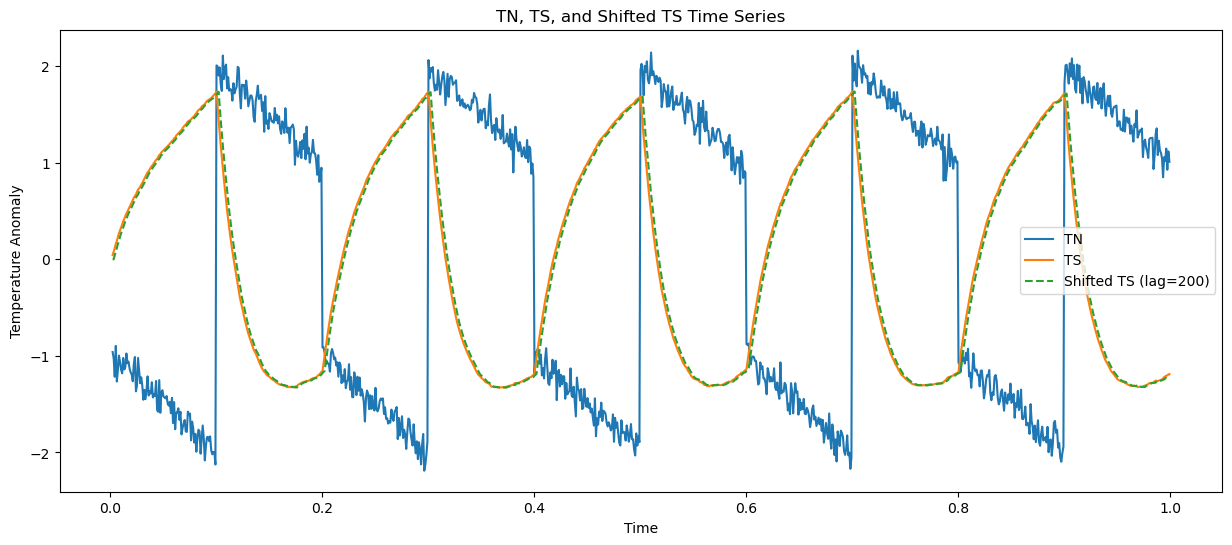

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd
from scipy import signal


t = np.linspace(0, 1, 1000, endpoint=False)
#print(mydata.iloc[:,[2]])
TN = -1*(signal.sawtooth(2 * np.pi * 5 * t))-2*(signal.square(2 * np.pi * 5 * t))

tau =   25  # Characteristic timescale in years
TS_initial = 0  # Initial condition for TS


# Calculate TS without noise, reversing the calculation direction
TS = np.zeros(len(TN))


TS[0] = TS_initial


for i in range(1, len(TN)-1):
    TN[i] = TN[i]  + np.random.normal(0, 0.1)
    TS[i+1] = TS[i] + (1/tau) * (-TN[i]-TS[i])


lag=2
# shift TS right by lag
TS_shifted = np.roll(TS, lag)
# crop the TS_shifted and TN array to exclude the lagged values
TS_shifted = TS_shifted[lag:]
TN = TN[lag:]
# crop t
t = t[lag:]
TS = TS[lag:]

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(t, TN, label='TN')
plt.plot(t, TS, label='TS')
plt.plot(t, TS_shifted, label='Shifted TS (lag=200)', linestyle='--')
# plt.xlim(0, 5000)  # Adjust x-axis limits for better visualization
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly')
plt.title('TN, TS, and Shifted TS Time Series')
plt.legend()
plt.show()


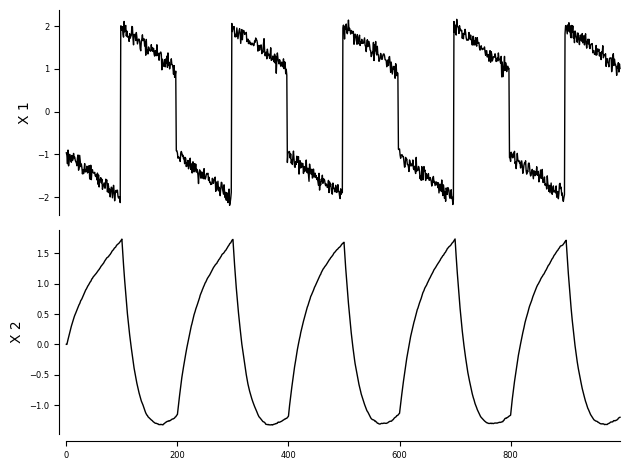

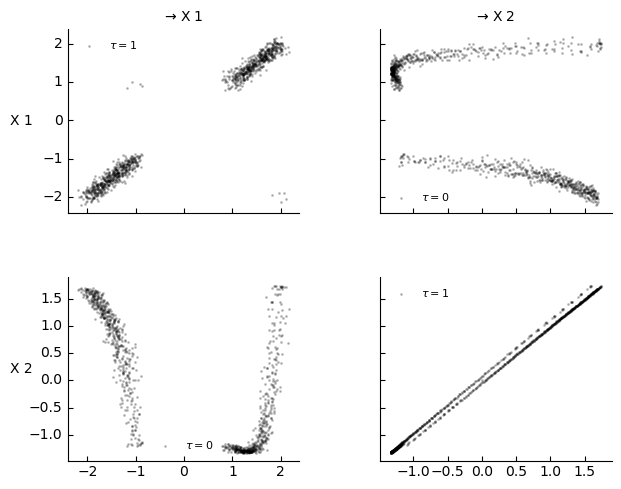


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


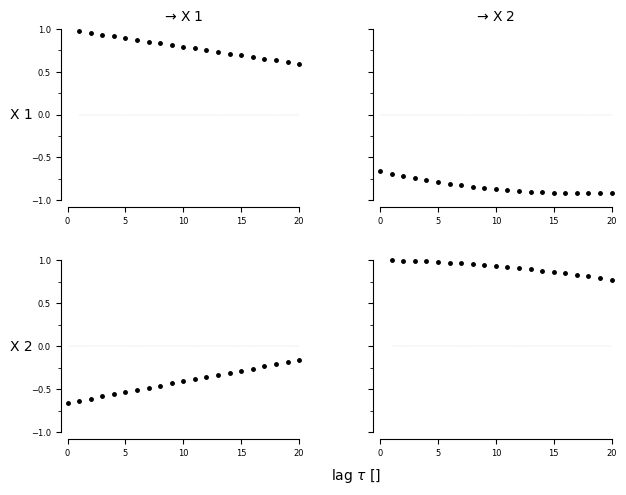


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 5
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X 1 has 4 link(s):
    [pc_alpha = 0.4]
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.668
        (X 1 -2): max_pval = 0.01896, |min_val| =  0.075
        (X 2 -2): max_pval = 0.33733, |min_val| =  0.031
        (X 2 -1): max_pval = 0.36474, |min_val| =  0.029

    Variable X 2 has 2 link(s):
    [pc_alpha = 0.05]
        (X 2 -1): max_pval = 0.00000, |min_val| =  0.882
        (X 1 -3): max_pval = 0.00000, |min_val| =  0.745

##
## Step 2: MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 1
tau_max = 5
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.668

    Variable X 2 has 6 link(s):

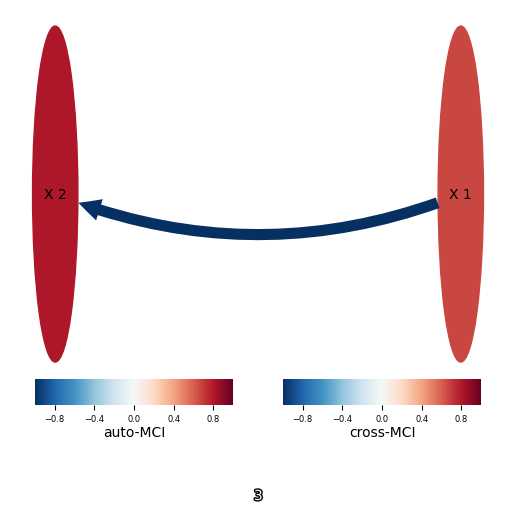

In [29]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
# from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI




var_names = [r'X 1', r'X 2']
data = np.array([TN, TS_shifted]).T
dataframe = pp.DataFrame(data, 
                         datatime = {0:np.arange(len(data))}, 
                         var_names=var_names)


tp.plot_timeseries(dataframe); plt.show()

parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)


matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()



pcmci.verbosity = 1
tau_min=1
tau_max=5
results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    )
plt.show()




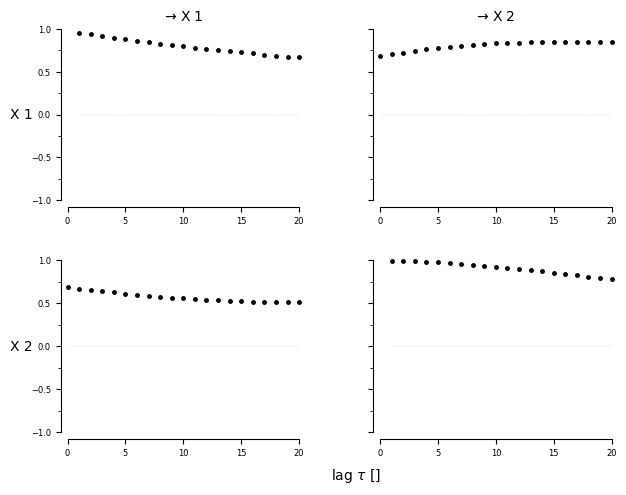


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 5
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1




d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_ve


## Resulting lagged parent (super)sets:

    Variable X 1 has 5 link(s):
    [pc_alpha = 0.05]
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.246
        (X 1 -2): max_pval = 0.00000, |min_val| =  0.123
        (X 1 -5): max_pval = 0.00000, |min_val| =  0.116
        (X 1 -4): max_pval = 0.00400, |min_val| =  0.097
        (X 1 -3): max_pval = 0.00600, |min_val| =  0.091

    Variable X 2 has 3 link(s):
    [pc_alpha = 0.05]
        (X 1 -3): max_pval = 0.00000, |min_val| =  0.751
        (X 2 -1): max_pval = 0.00000, |min_val| =  0.744
        (X 1 -1): max_pval = 0.03600, |min_val| =  0.078

##
## Step 2: MCI algorithm
##

Parameters:

independence test = gp_dc
tau_min = 1
tau_max = 5
max_conds_py = None
max_conds_px = None


d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_ve


## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.289

    Variable X 2 has 6 link(s):
        (X 2 -1): pval = 0.00000 | val =  0.993
        (X 1 -3): pval = 0.00000 | val =  0.901
        (X 2 -4): pval = 0.00000 | val =  0.763
        (X 2 -3): pval = 0.00000 | val =  0.761
        (X 2 -2): pval = 0.00000 | val =  0.755
        (X 2 -5): pval = 0.00000 | val =  0.731


d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


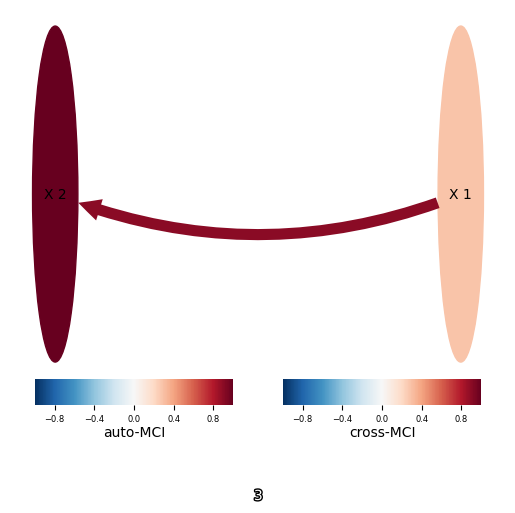

In [31]:
gpdc_test = gpdc.GPDC(significance='analytic', gp_params=None)
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=gpdc_test,
    verbosity=0)

matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
# tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()

pcmci.verbosity = 1
tau_min=1
tau_max=5
results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    ); plt.show()

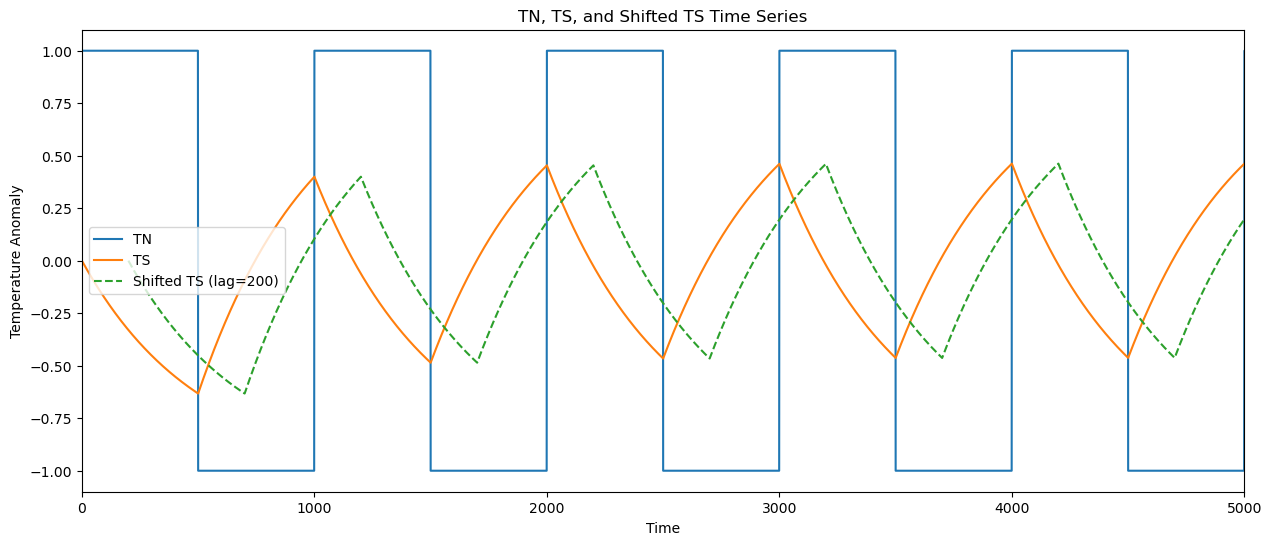

Maximum correlation occurs at lag 9999 with a value of 1.706


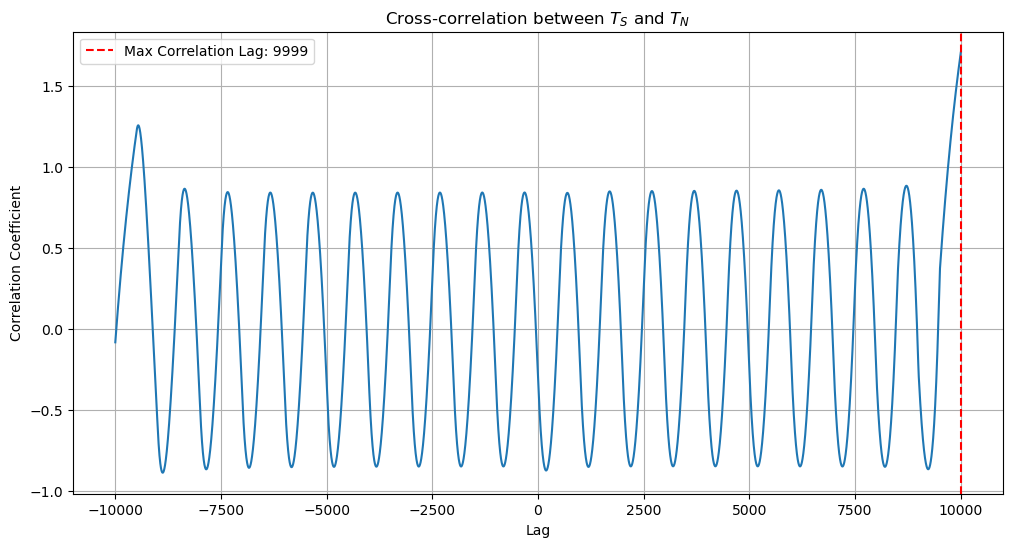

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Parameters
dt = 1
N = 10000  # Total number of time steps
t = np.arange(0, N*dt, dt)  # Time vector

# Square wave parameters
period = 1000
half_period = period / 2

# Generate TN as a square wave
TN = np.where((t % period) < half_period, 1, -1)

# Parameter
tau = 500

# Initialize TS
TS = np.zeros(N)
for i in range(N - 1):
    TS[i + 1] = TS[i] + dt * (1 / tau) * (-TN[i] - TS[i])

# Shift TS to create a lag of 200 units
lag = 200
shifted_TS = np.roll(TS, lag)
shifted_TS[:lag] = np.nan  # Set the first 'lag' values to NaN

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(t, TN, label='TN')
plt.plot(t, TS, label='TS')
plt.plot(t, shifted_TS, label='Shifted TS (lag=200)', linestyle='--')
plt.xlim(0, 5000)  # Adjust x-axis limits for better visualization
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly')
plt.title('TN, TS, and Shifted TS Time Series')
plt.legend()
plt.show()

# Corrected Cross-Correlation Computation
# Subtract mean
TN_demeaned = TN - np.mean(TN)
TS_demeaned = TS - np.mean(TS)

# Compute cross-correlation using 'full' mode
corr = correlate(TS_demeaned, TN_demeaned, mode='full')

# Compute the lags
lags = np.arange(-N + 1, N)

# Normalize the correlation to get the Pearson correlation coefficient at each lag
# We need to account for the varying number of overlapping points at each lag
# The denominator is (N - abs(lag)) * std(TS) * std(TN)
N_lag = N - np.abs(lags)
corr_coeff = corr / (np.std(TS) * np.std(TN) * N_lag)

# Find the lag where the correlation is maximum
max_corr_index = np.argmax(corr_coeff)
optimal_lag = lags[max_corr_index]
max_corr_value = corr_coeff[max_corr_index]

print(f'Maximum correlation occurs at lag {optimal_lag} with a value of {max_corr_value:.3f}')

# Plot correlation vs. lag
plt.figure(figsize=(12, 6))
plt.plot(lags, corr_coeff)
plt.title('Cross-correlation between $T_S$ and $T_N$')
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.axvline(x=optimal_lag, color='r', linestyle='--', label=f'Max Correlation Lag: {optimal_lag}')
plt.legend()
plt.show()


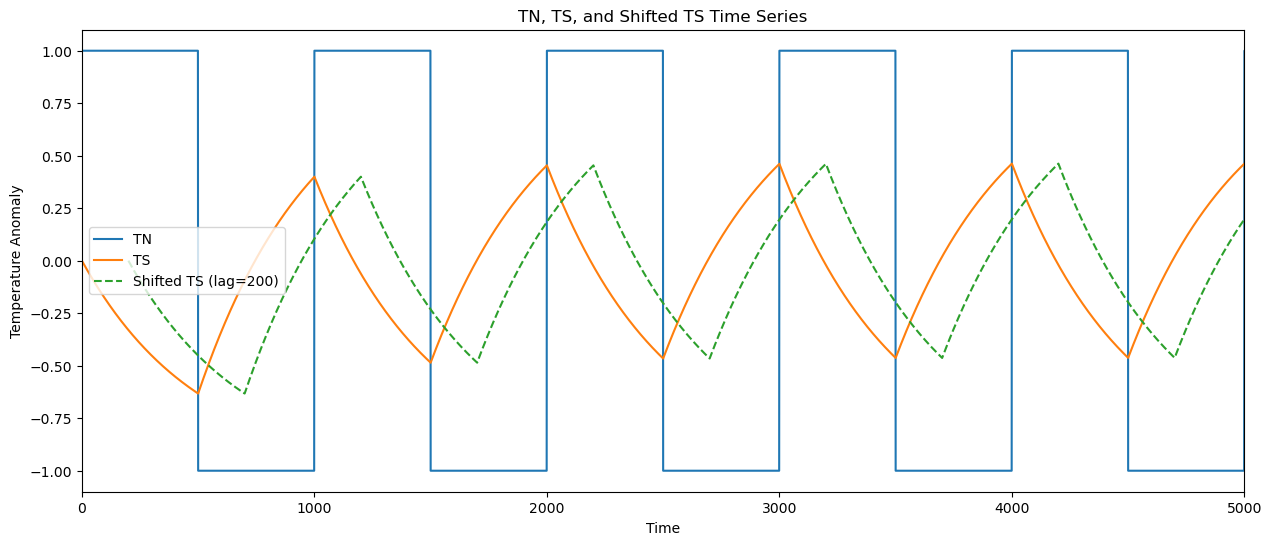

Maximum correlation occurs at lag -9999 with a value of nan


d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\scipy\signal\_signaltools.py:241: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)


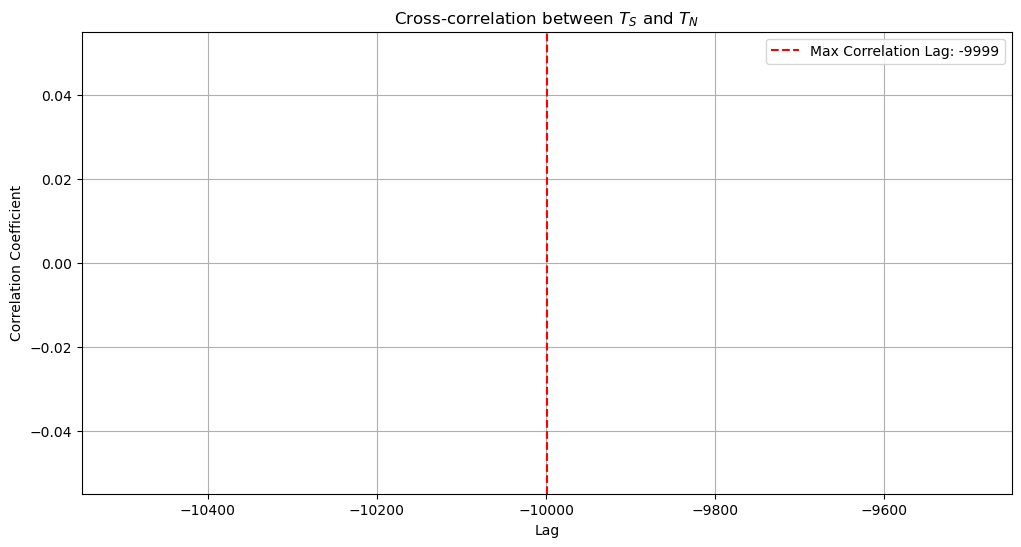

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Parameters
dt = 1
N = 10000  # Total number of time steps
t = np.arange(0, N*dt, dt)  # Time vector

# Square wave parameters
period = 1000
half_period = period / 2

# Generate TN as a square wave
TN = np.where((t % period) < half_period, 1, -1)
# Parameter
tau = 500

# Initialize TS
TS = np.zeros(N)
for i in range(N - 1):
    TS[i + 1] = TS[i] + dt * (1 / tau) * (-TN[i] - TS[i])

# Shift TS to create a lag of 200 units
lag = 200
shifted_TS = np.roll(TS, lag)
shifted_TS[:lag] = np.nan  # Set the first 'lag' values to NaN

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(t, TN, label='TN')
plt.plot(t, TS, label='TS')
plt.plot(t, shifted_TS, label='Shifted TS (lag=200)', linestyle='--')
plt.xlim(0, 5000)  # Adjust x-axis limits for better visualization
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly')
plt.title('TN, TS, and Shifted TS Time Series')
plt.legend()
plt.show()



lags = np.arange(-len(TN)+1, len(TN))
corr = correlate(TS - np.mean(TS), TN - np.mean(TN), mode='full') / (np.std(TS) * np.std(TN) * len(TN))

# Find the lag where the correlation is maximum
max_corr_index = np.argmax(corr)
optimal_lag = lags[max_corr_index]
max_corr_value = corr[max_corr_index]

print(f'Maximum correlation occurs at lag {optimal_lag} with a value of {max_corr_value:.3f}')

# Task 3: Plot correlation vs. lag
plt.figure(figsize=(12, 6))
plt.plot(lags, corr)
plt.title('Cross-correlation between $T_S$ and $T_N$')
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.axvline(x=optimal_lag, color='r', linestyle='--', label=f'Max Correlation Lag: {optimal_lag}')
plt.legend()
plt.show()

Maximum correlation occurs at lag -55 with a value of 0.744


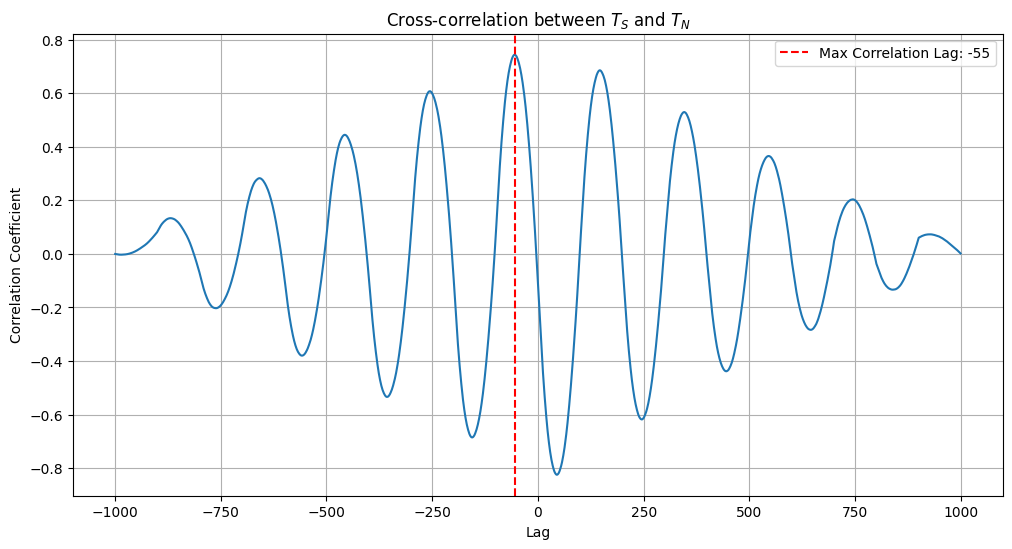

In [1]:
import numpy as np
from scipy.signal import correlate
from scipy.stats import pearsonr
from scipy import signal
import plotly.graph_objects as go
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000, endpoint=False)
TN = -1 * (signal.sawtooth(2 * np.pi * 5 * t)) - 3 * (signal.square(2 * np.pi * 5 * t))

# Parameters for the model
tau = 200  # Characteristic timescale in years
TS_initial = 0  # Initial condition for TS

# Calculate TS without noise, reversing the calculation direction
TS = np.zeros(len(TN))
TS[0] = TS_initial

for i in range(1, len(TN)):
    TN[i] = TN[i] + np.random.normal(0, 0.1)
    if i >= 5:
        TS[i] = TS[i - 1] + (1 / tau) * (-TN[i - 5] - TS[i - 5]) + np.random.normal(0, 0.01)
    else:
        TS[i] = TS[i - 1] + np.random.normal(0, 0.01)

# Plot TN and TS using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=np.arange(len(TN)),
    y=TN,
    mode='lines+markers',
    name='$T_N$',
    marker=dict(size=5),
    line=dict(width=1)
))
fig.add_trace(go.Scatter(
    x=np.arange(len(TS)),
    y=TS,
    mode='lines',
    name='$T_S$',
    line=dict(width=2)
))

fig.update_layout(
    title='Time Series of $T_N$ and $T_S$',
    xaxis_title='Time Step',
    yaxis_title='Value',
    legend_title='Variables',
    template='plotly_white',
    width=800,
    height=400
)

fig.show()



# plt.figure(figsize=(12, 6), dpi=900)
# plt.plot(TN, label='$T_N$', marker='o')
# plt.plot(TS, label='$T_S$')
# plt.title('Time Series of $T_N$ and $T_S$')
# plt.xlabel('Time Step')
# plt.ylabel('Value')
# plt.legend()
# plt.grid(True)
# plt.show()




# Task 2: Calculate the lagged correlation and find the lag between TN and TS
# Compute the cross-correlation
lags = np.arange(-len(TN)+1, len(TN))
corr = correlate(TS - np.mean(TS), TN - np.mean(TN), mode='full') / (np.std(TS) * np.std(TN) * len(TN))

# Find the lag where the correlation is maximum
max_corr_index = np.argmax(corr)
optimal_lag = lags[max_corr_index]
max_corr_value = corr[max_corr_index]

print(f'Maximum correlation occurs at lag {optimal_lag} with a value of {max_corr_value:.3f}')

# Task 3: Plot correlation vs. lag
plt.figure(figsize=(12, 6))
plt.plot(lags, corr)
plt.title('Cross-correlation between $T_S$ and $T_N$')
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.axvline(x=optimal_lag, color='r', linestyle='--', label=f'Max Correlation Lag: {optimal_lag}')
plt.legend()
plt.show()

In [15]:
# install nbformat>=4.2.0
!pip install nbformat>=4.2.0

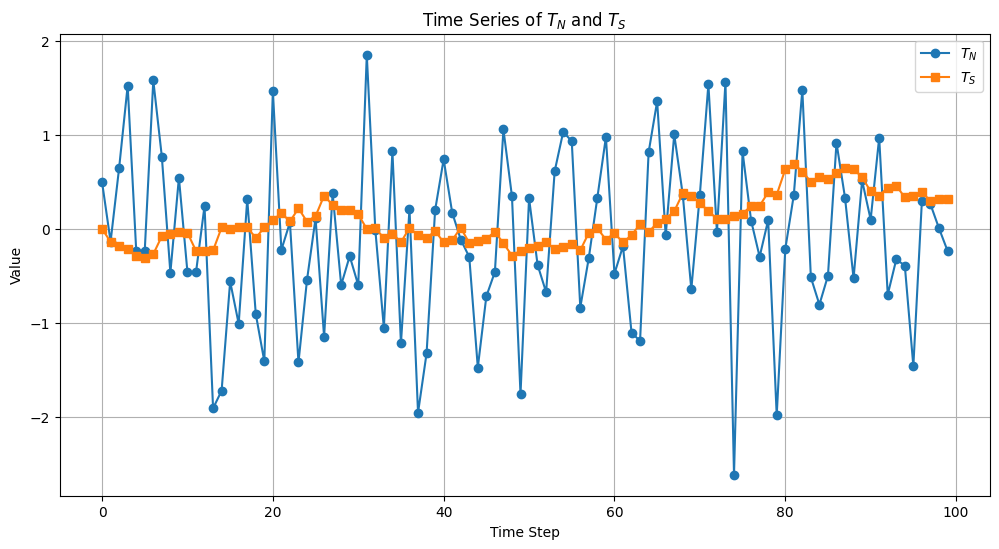

Maximum correlation occurs at lag 21 with a value of 0.190


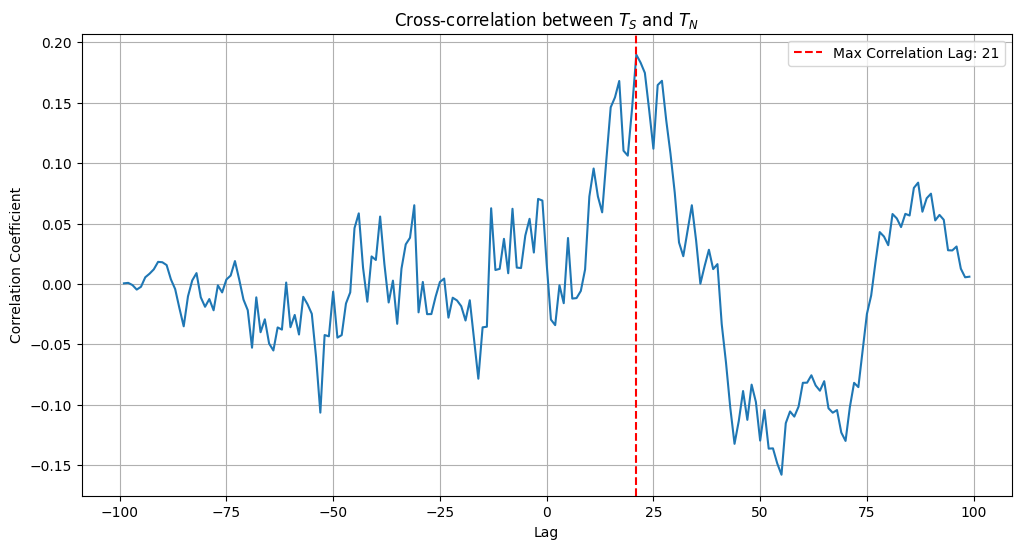

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.stats import pearsonr
from scipy import signal

# Set a seed for reproducibility
np.random.seed(42)

# Generate TN as random normal variables
TN = np.random.normal(size=100)
# TN = -1*(signal.sawtooth(2 * np.pi * 5 * t))-3*(signal.square(2 * np.pi * 5 * t))

# Parameters for the model
tau = 1000  # Characteristic timescale
TS_initial = 0  # Initial condition for TS

# Initialize TS
TS = np.zeros(len(TN))
TS[0] = TS_initial

# Generate TS using the provided model
for i in range(1, len(TN)):
    TS[i] = TS[i-1] + (1/tau) * (-TS[i-1] + TN[i-1]) + np.random.normal(0, 0.1)

# Task 1: Plot TN and TS
plt.figure(figsize=(12, 6))
plt.plot(TN, label='$T_N$', marker='o')
plt.plot(TS, label='$T_S$', marker='s')
plt.title('Time Series of $T_N$ and $T_S$')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Task 2: Calculate the lagged correlation and find the lag between TN and TS
# Compute the cross-correlation
lags = np.arange(-len(TN)+1, len(TN))
corr = correlate(TS - np.mean(TS), TN - np.mean(TN), mode='full') / (np.std(TS) * np.std(TN) * len(TN))

# Find the lag where the correlation is maximum
max_corr_index = np.argmax(corr)
optimal_lag = lags[max_corr_index]
max_corr_value = corr[max_corr_index]

print(f'Maximum correlation occurs at lag {optimal_lag} with a value of {max_corr_value:.3f}')

# Task 3: Plot correlation vs. lag
plt.figure(figsize=(12, 6))
plt.plot(lags, corr)
plt.title('Cross-correlation between $T_S$ and $T_N$')
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.axvline(x=optimal_lag, color='r', linestyle='--', label=f'Max Correlation Lag: {optimal_lag}')
plt.legend()
plt.show()



Text(0.5, 1.0, 'Time Series of $\\Delta T_N$')

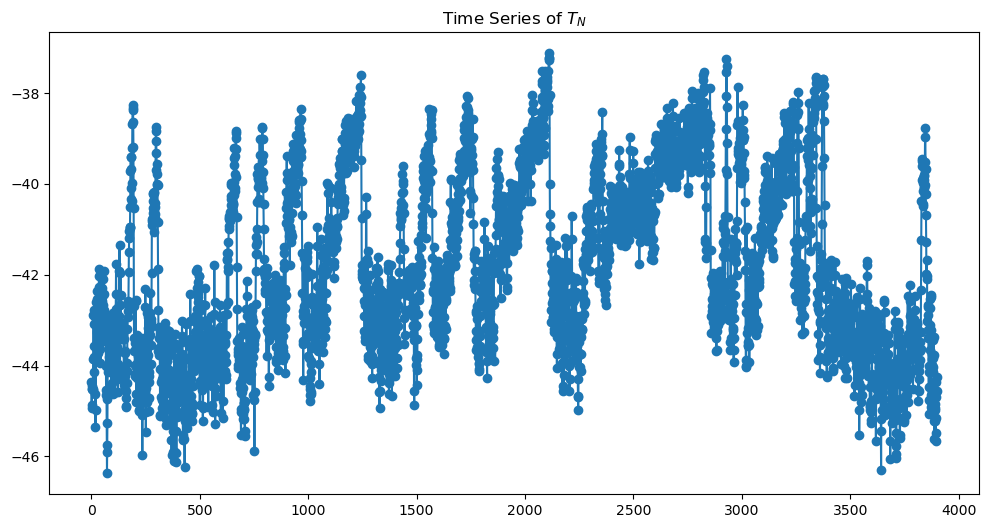

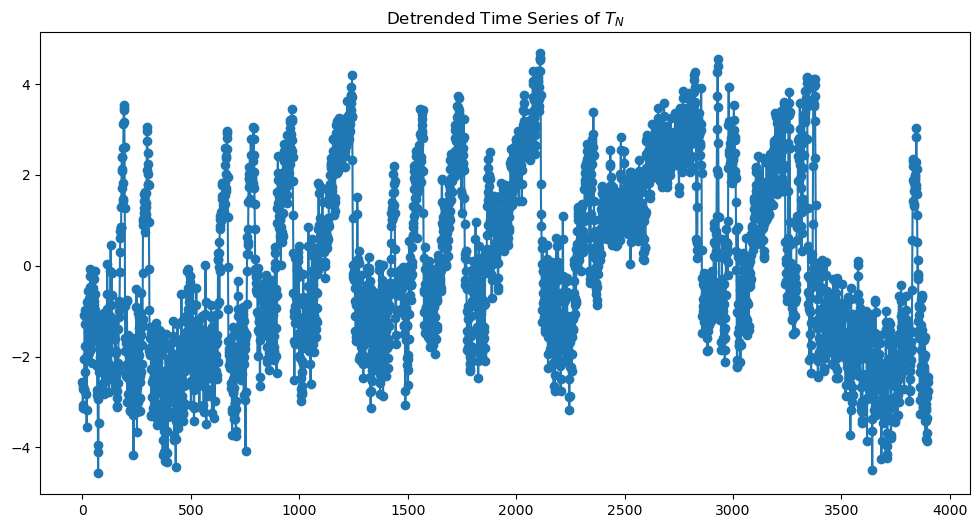

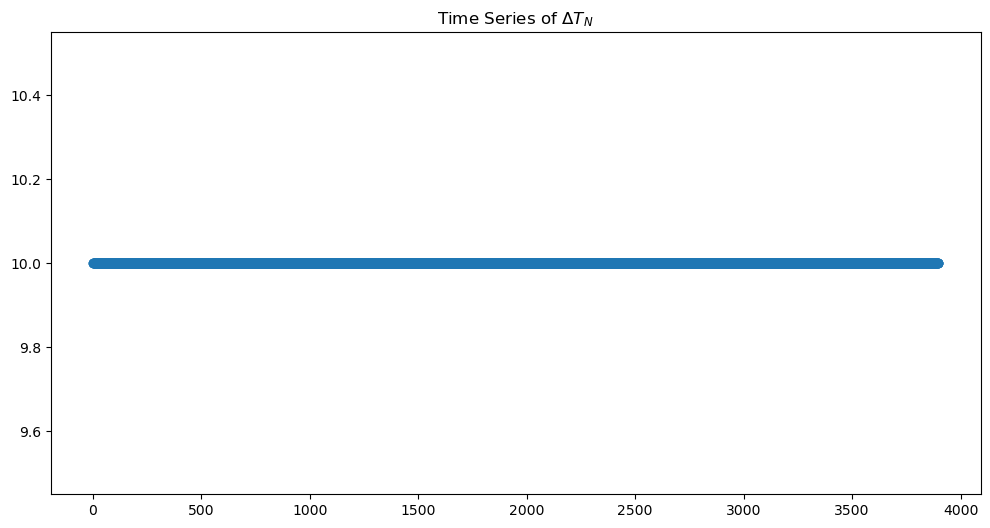

In [27]:
import pandas as pd

df_TN = pd.read_csv("realdata.csv")
# get the second column of TN
TN = df_TN.iloc[:, 1].values

# plot TN
plt.figure(figsize=(12, 6))
plt.plot(TN, label='$T_N$', marker='o')
plt.title('Time Series of $T_N$')

# detrend TN and plot it
TN_detrended = TN - np.mean(TN)
plt.figure(figsize=(12, 6))
plt.plot(TN_detrended, label='$T_N$ Detrended', marker='o')
plt.title('Detrended Time Series of $T_N$')


# calcualte the np.diff of TN and plot it
TN_time = df_TN.iloc[:, 0].values
TN_time_diff = np.diff(TN_time)
plt.figure(figsize=(12, 6))
plt.plot(TN_time_diff, label='$\Delta T_N$', marker='o')
plt.title('Time Series of $\Delta T_N$')

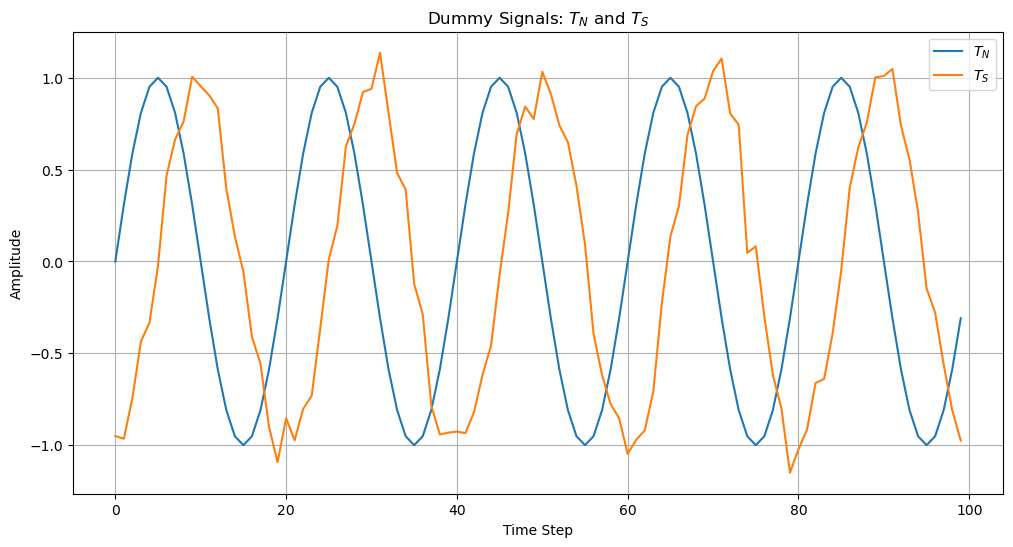

Maximum correlation occurs at lag 5 with a value of 0.937


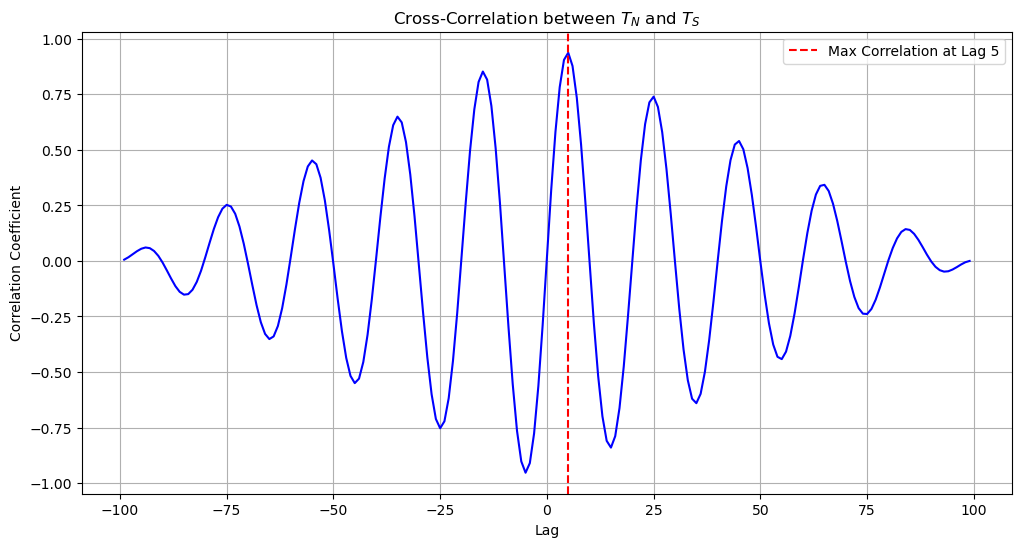

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Set a seed for reproducibility
np.random.seed(42)

# Step 1: Generate Dummy Signals
time_steps = 100
t = np.arange(time_steps)
TN = np.sin(2 * np.pi * t / 20)  # TN is a sine wave

true_lag = 5  # TS lags behind TN by 5 time steps
noise_level = 0.1

TS = np.roll(TN, true_lag) + np.random.normal(0, noise_level, time_steps)

# Plot the Dummy Signals
plt.figure(figsize=(12, 6))
plt.plot(t, TN, label='$T_N$')
plt.plot(t, TS, label='$T_S$')
plt.title('Dummy Signals: $T_N$ and $T_S$')
plt.xlabel('Time Step')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Calculate the Lagged Correlation
TN_centered = TN - np.mean(TN)
TS_centered = TS - np.mean(TS)

correlation = correlate(TS_centered, TN_centered, mode='full')
lags = np.arange(-time_steps + 1, time_steps)
correlation_normalized = correlation / (np.std(TS) * np.std(TN) * time_steps)

# Step 3: Identify the Lag with Maximum Correlation
max_corr_index = np.argmax(correlation_normalized)
optimal_lag = lags[max_corr_index]
max_corr_value = correlation_normalized[max_corr_index]

print(f'Maximum correlation occurs at lag {optimal_lag} with a value of {max_corr_value:.3f}')

# Step 4: Plot the Correlation Strength with Lag
plt.figure(figsize=(12, 6))
plt.plot(lags, correlation_normalized, color='blue')
plt.title('Cross-Correlation between $T_N$ and $T_S$')
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.axvline(x=optimal_lag, color='red', linestyle='--', label=f'Max Correlation at Lag {optimal_lag}')
plt.legend()
plt.show()


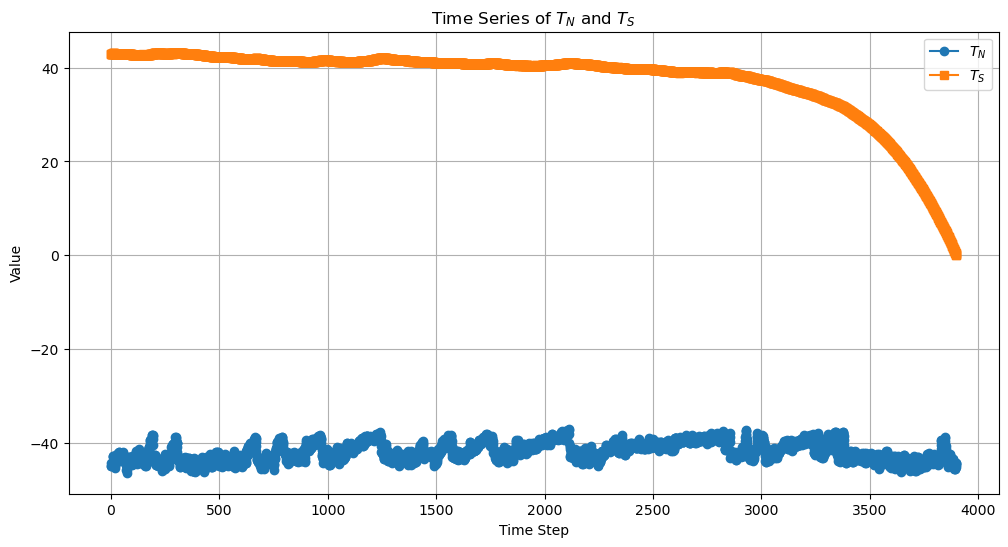

Maximum correlation occurs at lag 3276 with a value of 0.304


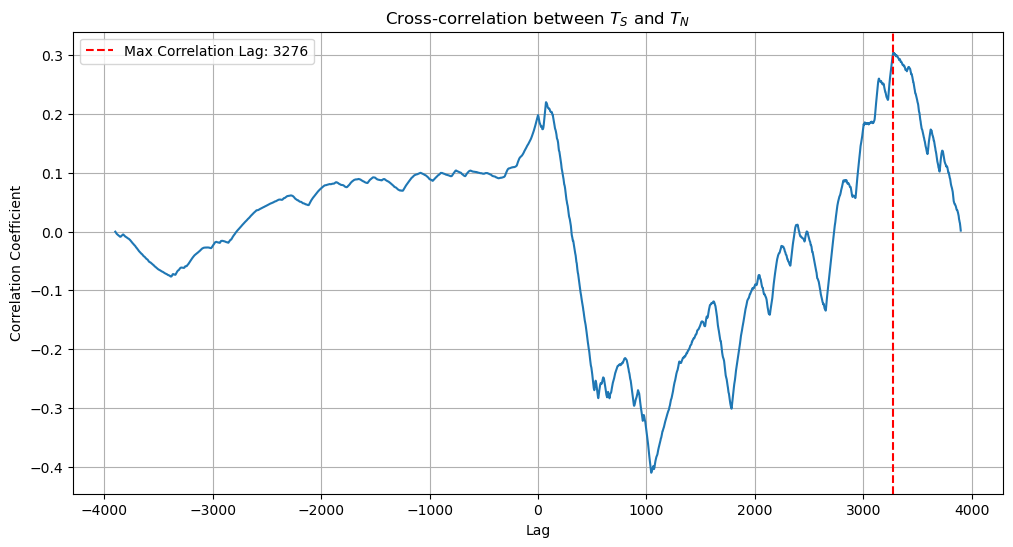

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd


# read the realdata.csv

TN = pd.read_csv("realdata.csv")
# get the second column of TN
TN = TN.iloc[:, 1].values





# Parameters for the model
tau = 400  # Characteristic timescale in years
TS_initial = 0  # Initial condition for TS


# Calculate TS without noise, reversing the calculation direction
TS = np.zeros(len(TN))


TS[0] = TS_initial


for i in range(len(TN)-2,-1,-1):

    TS[i] = TS[i+1] + (1/tau) * (-TN[i+1]-TS[i+1])+np.random.normal(0, 0.01)


# Task 1: Plot TN and TS
plt.figure(figsize=(12, 6))
plt.plot(TN, label='$T_N$', marker='o')
plt.plot(TS, label='$T_S$', marker='s')
plt.title('Time Series of $T_N$ and $T_S$')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Task 2: Calculate the lagged correlation and find the lag between TN and TS
# Compute the cross-correlation
lags = np.arange(-len(TN)+1, len(TN))
corr = correlate(TS - np.mean(TS), TN - np.mean(TN), mode='full') / (np.std(TS) * np.std(TN) * len(TN))

# Find the lag where the correlation is maximum
max_corr_index = np.argmax(corr)
optimal_lag = lags[max_corr_index]
max_corr_value = corr[max_corr_index]

print(f'Maximum correlation occurs at lag {optimal_lag} with a value of {max_corr_value:.3f}')

# Task 3: Plot correlation vs. lag
plt.figure(figsize=(12, 6))
plt.plot(lags, corr)
plt.title('Cross-correlation between $T_S$ and $T_N$')
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.axvline(x=optimal_lag, color='r', linestyle='--', label=f'Max Correlation Lag: {optimal_lag}')
plt.legend()
plt.show()


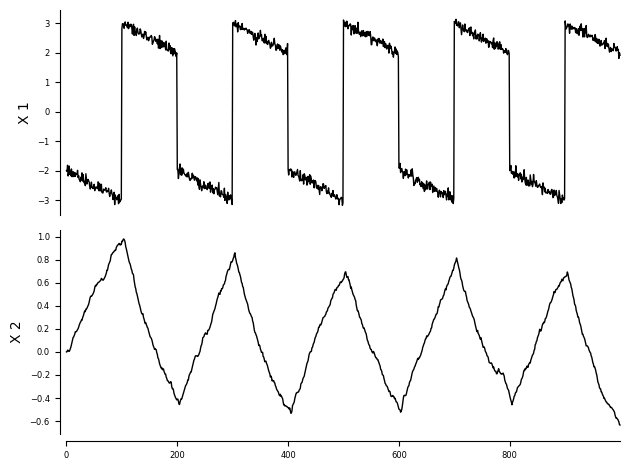

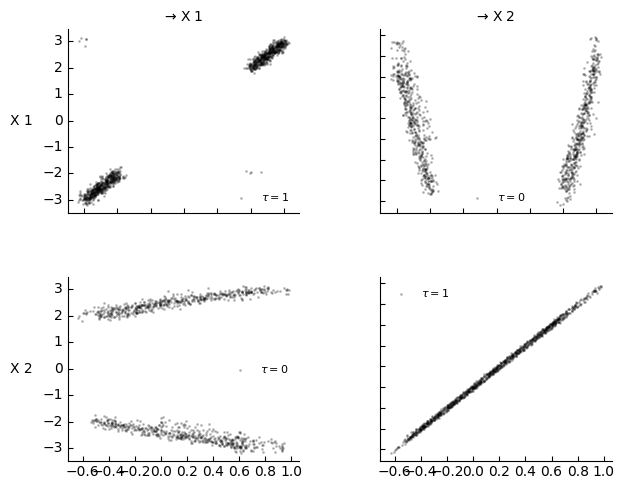


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


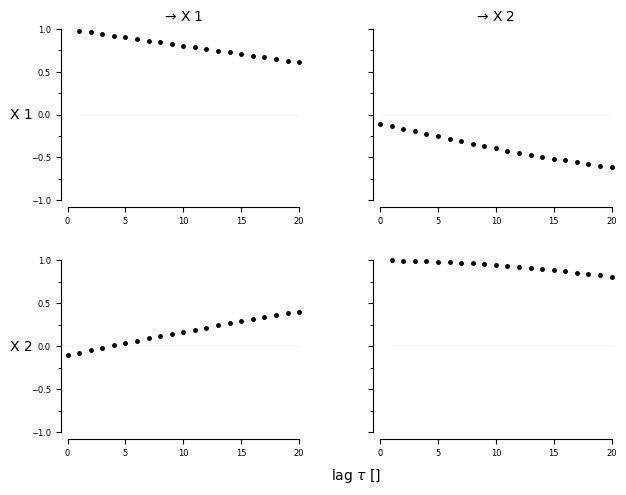

In [ ]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
# from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI




var_names = [r'X 1', r'X 2']
data = np.array([TN, TS]).T
dataframe = pp.DataFrame(data, 
                         datatime = {0:np.arange(len(data))}, 
                         var_names=var_names)


tp.plot_timeseries(dataframe); plt.show()

parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)


matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()



pcmci.verbosity = 1
tau_min=1
tau_max=6
results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    )
plt.show()





##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X 1 has 3 link(s):
    [pc_alpha = 0.1]
        (X 1 -1): max_pval = 0.00000, min_val =  0.688
        (X 2 -6): max_pval = 0.06166, min_val =  0.059
        (X 2 -1): max_pval = 0.07922, min_val = -0.056

    Variable X 2 has 3 link(s):
    [pc_alpha = 0.1]
        (X 2 -1): max_pval = 0.00000, min_val =  0.999
        (X 1 -5): max_pval = 0.00000, min_val = -0.198
        (X 1 -2): max_pval = 0.08346, min_val =  0.055

##
## Step 2: MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 1
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.680

    Variable X 2 has 2 link(s):
        (X 2 -1): pva

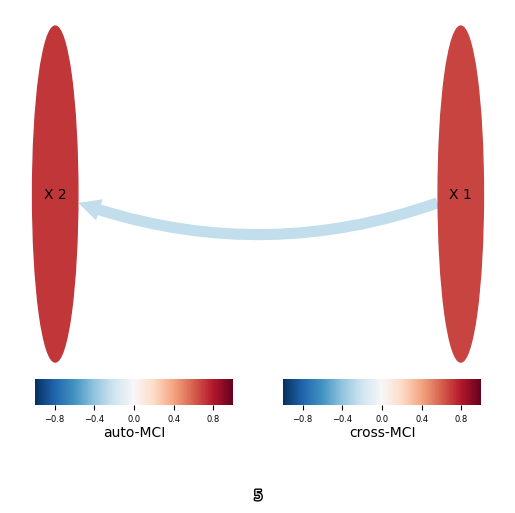